In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_recall_curve, auc, classification_report
from sklearn.linear_model import RidgeCV
import sys
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
log_data_raw = pd.read_csv("../data/Hate_crime1/combined_data_processed_data.csv")

In [3]:
log_data = log_data_raw.sample(10000)

In [4]:
log_data["OFFENDER_RACE"].value_counts().index

Index(['Unknown', 'White', 'Black or African American', 'Multiple', 'Asian',
       'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'],
      dtype='object')

In [5]:
log_data = pd.get_dummies(log_data, columns=["POPULATION_GROUP_DESC","OFFENDER_RACE","BIAS_DESC"])



In [6]:
log_data.head(5)

,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,SEVERITY,"POPULATION_GROUP_DESC_Cities 1,000,000 or over","POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999","POPULATION_GROUP_DESC_Cities from 100,000 thru 249,999","POPULATION_GROUP_DESC_Cities from 2,500 thru 9,999","POPULATION_GROUP_DESC_Cities from 25,000 thru 49,999","POPULATION_GROUP_DESC_Cities from 250,000 thru 499,999","POPULATION_GROUP_DESC_Cities from 50,000 thru 99,999",...,BIAS_DESC_Anti-Native Hawaiian or Other Pacific Islander,BIAS_DESC_Anti-Other Christian,BIAS_DESC_Anti-Other Race/Ethnicity/Ancestry,BIAS_DESC_Anti-Other Race/Ethnicity/Ancestry;Anti-White,BIAS_DESC_Anti-Other Religion,BIAS_DESC_Anti-Physical Disability,BIAS_DESC_Anti-Protestant,BIAS_DESC_Anti-Sikh,BIAS_DESC_Anti-Transgender,BIAS_DESC_Anti-White
383350,1,2,Violent,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
100695,1,1,Violent,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
408422,1,1,Violent,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274095,2,5,Violent,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
203619,0,1,Non-Violent,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
log_data.columns
log_data.to_csv('log_data.csv', index=False)

In [8]:
log_data.drop(["OFFENDER_RACE_Unknown","POPULATION_GROUP_DESC_Cities 1,000,000 or over","BIAS_DESC_Anti-Other Race/Ethnicity/Ancestry"], axis = 1)

,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,SEVERITY,"POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999","POPULATION_GROUP_DESC_Cities from 100,000 thru 249,999","POPULATION_GROUP_DESC_Cities from 2,500 thru 9,999","POPULATION_GROUP_DESC_Cities from 25,000 thru 49,999","POPULATION_GROUP_DESC_Cities from 250,000 thru 499,999","POPULATION_GROUP_DESC_Cities from 50,000 thru 99,999","POPULATION_GROUP_DESC_Cities from 500,000 thru 999,999",...,"BIAS_DESC_Anti-Multiple Religions, Group",BIAS_DESC_Anti-Native Hawaiian or Other Pacific Islander,BIAS_DESC_Anti-Other Christian,BIAS_DESC_Anti-Other Race/Ethnicity/Ancestry;Anti-White,BIAS_DESC_Anti-Other Religion,BIAS_DESC_Anti-Physical Disability,BIAS_DESC_Anti-Protestant,BIAS_DESC_Anti-Sikh,BIAS_DESC_Anti-Transgender,BIAS_DESC_Anti-White
383350,1,2,Violent,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100695,1,1,Violent,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408422,1,1,Violent,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274095,2,5,Violent,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
203619,0,1,Non-Violent,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281210,2,1,Violent,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50352,1,2,Violent,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
425853,1,1,Violent,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
389515,1,1,Violent,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
min_max = MinMaxScaler()
log_data[["TOTAL_OFFENDER_COUNT", "VICTIM_COUNT"]] = min_max.fit_transform(log_data[["TOTAL_OFFENDER_COUNT", "VICTIM_COUNT"]])


In [10]:
print(log_data.head())

        TOTAL_OFFENDER_COUNT  VICTIM_COUNT     SEVERITY  \
383350              0.043478      0.005025      Violent   
100695              0.043478      0.000000      Violent   
408422              0.043478      0.000000      Violent   
274095              0.086957      0.020101      Violent   
203619              0.000000      0.000000  Non-Violent   

        POPULATION_GROUP_DESC_Cities 1,000,000 or over  \
383350                                               0   
100695                                               0   
408422                                               0   
274095                                               0   
203619                                               0   

        POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999  \
383350                                                  0      
100695                                                  0      
408422                                                  0      
274095                                  

In [11]:
log_data.value_counts()

TOTAL_OFFENDER_COUNT  VICTIM_COUNT  SEVERITY     POPULATION_GROUP_DESC_Cities 1,000,000 or over  POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999  POPULATION_GROUP_DESC_Cities from 100,000 thru 249,999  POPULATION_GROUP_DESC_Cities from 2,500 thru 9,999  POPULATION_GROUP_DESC_Cities from 25,000 thru 49,999  POPULATION_GROUP_DESC_Cities from 250,000 thru 499,999  POPULATION_GROUP_DESC_Cities from 50,000 thru 99,999  POPULATION_GROUP_DESC_Cities from 500,000 thru 999,999  POPULATION_GROUP_DESC_Cities under 2,500  POPULATION_GROUP_DESC_MSA State Police  POPULATION_GROUP_DESC_MSA counties 100,000 or over  POPULATION_GROUP_DESC_MSA counties from 10,000 thru 24,999  POPULATION_GROUP_DESC_MSA counties from 25,000 thru 99,999  POPULATION_GROUP_DESC_MSA counties under 10,000  POPULATION_GROUP_DESC_Non-MSA State Police  POPULATION_GROUP_DESC_Non-MSA counties 100,000 or over  POPULATION_GROUP_DESC_Non-MSA counties from 10,000 thru 24,999  POPULATION_GROUP_DESC_Non-MSA counties from 25,000 thr

In [12]:
y = log_data['SEVERITY']
X = log_data.drop("SEVERITY", axis =1)


In [13]:
y

383350        Violent
100695        Violent
408422        Violent
274095        Violent
203619    Non-Violent
             ...     
281210        Violent
50352         Violent
425853        Violent
389515        Violent
369253        Violent
Name: SEVERITY, Length: 10000, dtype: object

In [14]:
X


,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,"POPULATION_GROUP_DESC_Cities 1,000,000 or over","POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999","POPULATION_GROUP_DESC_Cities from 100,000 thru 249,999","POPULATION_GROUP_DESC_Cities from 2,500 thru 9,999","POPULATION_GROUP_DESC_Cities from 25,000 thru 49,999","POPULATION_GROUP_DESC_Cities from 250,000 thru 499,999","POPULATION_GROUP_DESC_Cities from 50,000 thru 99,999","POPULATION_GROUP_DESC_Cities from 500,000 thru 999,999",...,BIAS_DESC_Anti-Native Hawaiian or Other Pacific Islander,BIAS_DESC_Anti-Other Christian,BIAS_DESC_Anti-Other Race/Ethnicity/Ancestry,BIAS_DESC_Anti-Other Race/Ethnicity/Ancestry;Anti-White,BIAS_DESC_Anti-Other Religion,BIAS_DESC_Anti-Physical Disability,BIAS_DESC_Anti-Protestant,BIAS_DESC_Anti-Sikh,BIAS_DESC_Anti-Transgender,BIAS_DESC_Anti-White
383350,0.043478,0.005025,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100695,0.043478,0.000000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
408422,0.043478,0.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274095,0.086957,0.020101,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
203619,0.000000,0.000000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281210,0.086957,0.000000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50352,0.043478,0.005025,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
425853,0.043478,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
389515,0.043478,0.000000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

In [16]:
logreg.feature_names_in_

array(['TOTAL_OFFENDER_COUNT', 'VICTIM_COUNT',
       'POPULATION_GROUP_DESC_Cities 1,000,000 or over',
       'POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999',
       'POPULATION_GROUP_DESC_Cities from 100,000 thru 249,999',
       'POPULATION_GROUP_DESC_Cities from 2,500 thru 9,999',
       'POPULATION_GROUP_DESC_Cities from 25,000 thru 49,999',
       'POPULATION_GROUP_DESC_Cities from 250,000 thru 499,999',
       'POPULATION_GROUP_DESC_Cities from 50,000 thru 99,999',
       'POPULATION_GROUP_DESC_Cities from 500,000 thru 999,999',
       'POPULATION_GROUP_DESC_Cities under 2,500',
       'POPULATION_GROUP_DESC_MSA State Police',
       'POPULATION_GROUP_DESC_MSA counties 100,000 or over',
       'POPULATION_GROUP_DESC_MSA counties from 10,000 thru 24,999',
       'POPULATION_GROUP_DESC_MSA counties from 25,000 thru 99,999',
       'POPULATION_GROUP_DESC_MSA counties under 10,000',
       'POPULATION_GROUP_DESC_Non-MSA State Police',
       'POPULATION_GROUP_DESC_Non-MSA cou

In [17]:
logreg.coef_

array([[ 2.48767757,  1.31355016,  0.29316961,  0.06662463,  0.02251859,
         0.05336476,  0.08208585,  0.43630212,  0.1792715 ,  0.43196828,
        -0.17022885,  0.12581319, -0.26367522, -0.56607522, -0.22737079,
        -0.0896172 , -0.17585512, -0.1418722 ,  0.07001087,  0.10482312,
        -0.20109744, -0.1877315 ,  0.54471287,  0.60726984,  0.30816776,
         0.24190698, -1.72880864,  0.24464315, -0.72985593,  0.76579316,
         0.87013737,  0.53122723,  0.56087712,  0.17210444, -0.5456602 ,
         0.25592943, -0.29845119,  0.46358801, -0.2792245 ,  0.21390076,
         0.20521061, -0.71250805,  0.53429918, -0.27702221,  0.82673772,
         0.3468006 ,  0.51179238, -0.16363404,  0.51179238, -0.76581156,
         0.1295673 , -1.47194402, -0.04403557,  0.14323794,  0.20961898,
         0.9208203 ,  0.25131874,  0.57331016, -0.2256157 , -0.10200682,
         0.70277506,  0.42525701,  0.34036398, -0.28079957, -0.51006867,
        -0.48115257,  0.20693357,  0.27022823,  0.6

In [18]:
coef_df = pd.Series(logreg.coef_[0], index=logreg.feature_names_in_)

In [19]:
coef_df.sort_values()

OFFENDER_RACE_Unknown                                            -1.728809
BIAS_DESC_Anti-Eastern Orthodox (Russian, Greek, Other)          -1.471944
BIAS_DESC_Anti-Sikh                                              -1.214678
BIAS_DESC_Anti-Protestant                                        -1.091208
BIAS_DESC_Anti-Multiple Religions, Group                         -1.089560
                                                                    ...   
BIAS_DESC_Anti-Black or African American;Anti-Lesbian (Female)    0.826738
BIAS_DESC_Anti-Arab;Anti-Islamic (Muslim)                         0.870137
BIAS_DESC_Anti-Gay (Male)                                         0.920820
VICTIM_COUNT                                                      1.313550
TOTAL_OFFENDER_COUNT                                              2.487678
Length: 85, dtype: float64

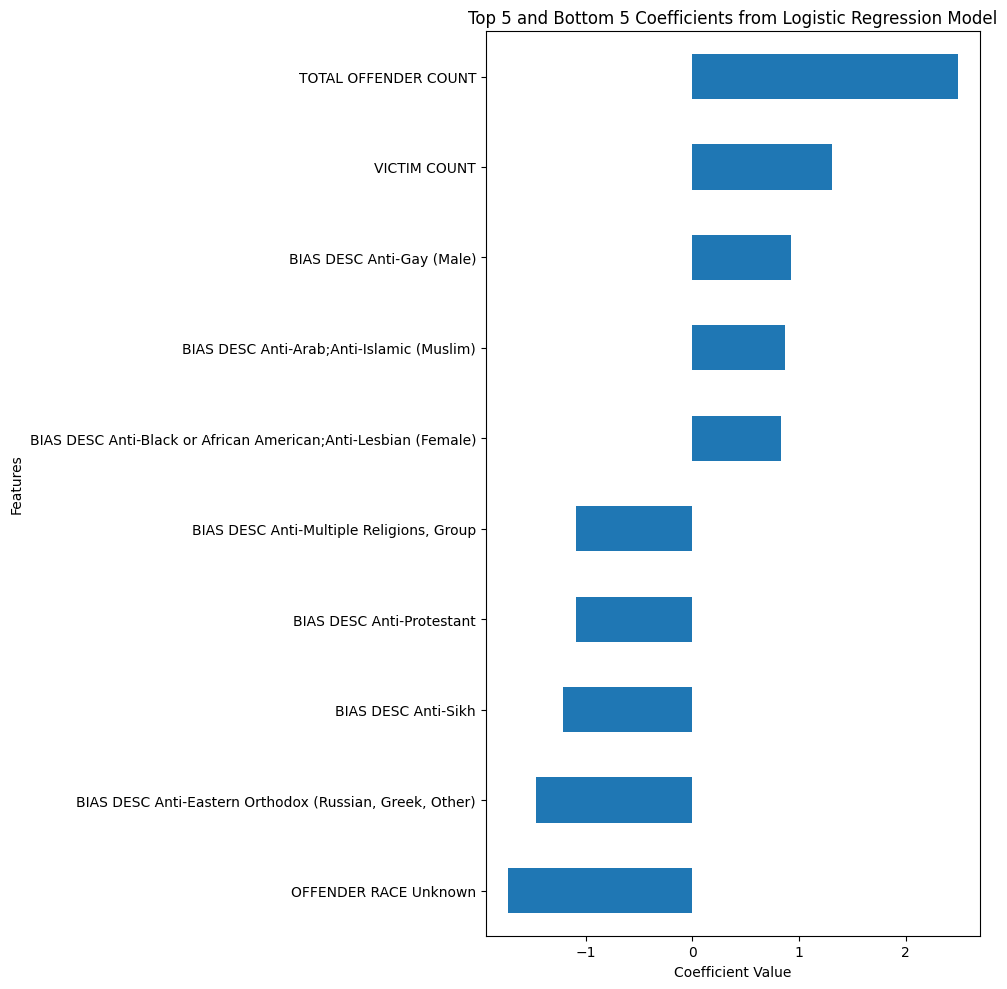

In [20]:
plt.figure(figsize=(10, 10))
top_coef_df = coef_df.sort_values(ascending=False).head(5)
bottom_coef_df = coef_df.sort_values(ascending=True).head(5)
combined_coef_df = pd.concat([top_coef_df, bottom_coef_df])

# Remove underscores from feature names
combined_coef_df.index = combined_coef_df.index.str.replace('_', ' ')

combined_coef_df.sort_values().plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Top 5 and Bottom 5 Coefficients from Logistic Regression Model')
plt.tight_layout()
plt.show()


In [30]:
# Extract the coefficients from the logistic regression model
coefficients = logreg.coef_[0]

# Get the feature names from your X dataframe
feature_names = X.columns

# Create a dictionary to store the odds ratios
odds_ratios = {}

# Compute odds ratios for each feature
for feature, coef in zip(feature_names, coefficients):
    odds_ratio = np.exp(coef)  # Compute the odds ratio
    odds_ratios[feature] = odds_ratio

# Display the odds ratios
for feature, odds_ratio in odds_ratios.items():
    print(f"Feature: {feature}, Odds Ratio: {odds_ratio:.2f}")


Feature: TOTAL_OFFENDER_COUNT, Odds Ratio: 12.03
Feature: VICTIM_COUNT, Odds Ratio: 3.72
Feature: POPULATION_GROUP_DESC_Cities 1,000,000 or over, Odds Ratio: 1.34
Feature: POPULATION_GROUP_DESC_Cities from 10,000 thru 24,999, Odds Ratio: 1.07
Feature: POPULATION_GROUP_DESC_Cities from 100,000 thru 249,999, Odds Ratio: 1.02
Feature: POPULATION_GROUP_DESC_Cities from 2,500 thru 9,999, Odds Ratio: 1.05
Feature: POPULATION_GROUP_DESC_Cities from 25,000 thru 49,999, Odds Ratio: 1.09
Feature: POPULATION_GROUP_DESC_Cities from 250,000 thru 499,999, Odds Ratio: 1.55
Feature: POPULATION_GROUP_DESC_Cities from 50,000 thru 99,999, Odds Ratio: 1.20
Feature: POPULATION_GROUP_DESC_Cities from 500,000 thru 999,999, Odds Ratio: 1.54
Feature: POPULATION_GROUP_DESC_Cities under 2,500, Odds Ratio: 0.84
Feature: POPULATION_GROUP_DESC_MSA State Police, Odds Ratio: 1.13
Feature: POPULATION_GROUP_DESC_MSA counties 100,000 or over, Odds Ratio: 0.77
Feature: POPULATION_GROUP_DESC_MSA counties from 10,000 thru 

In [2]:
log_data2 = pd.read_csv("../src/combined_data_processed_data.csv")

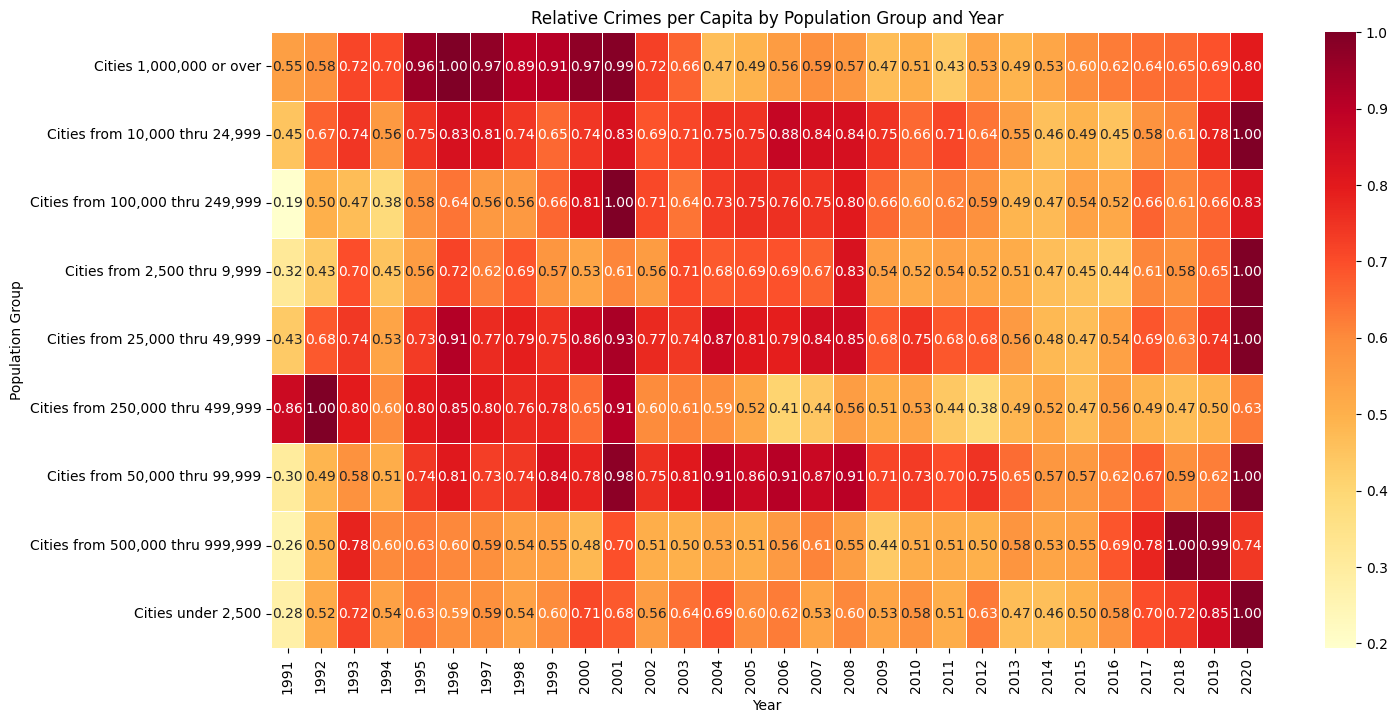

In [6]:

# Filter out unwanted categories
filtered_data = log_data2[~log_data2['POPULATION_GROUP_DESC'].isin([
    'MSA counties 100,000 or over',
    'MSA counties from 10,000 thru 24,999',
    'MSA counties under 10,000',
    'Non-MSA counties from 10,000 thru 24,999',
    'Non-MSA counties from 25,000 thru 99,999',
    'Non-MSA counties under 10,000',
    'Possessions (Puerto Rico, Guam, Canal Zone, Virgin Islands, and American Samoa)',
    'MSA State Police', 'MSA counties from 25,000 thru 99,999', 'Non-MSA State Police',
    'Non-MSA counties 100,000 or over'
])]

# Group data by population group and year
grouped_data = filtered_data.groupby(['POPULATION_GROUP_DESC', 'DATA_YEAR'])['INCIDENT_ID'].count().reset_index()

# Calculate relative crime count within each population group
grouped_data['RELATIVE_CRIME_COUNT'] = grouped_data.groupby('POPULATION_GROUP_DESC')['INCIDENT_ID'].transform(lambda x: x / x.max())

# Create a pivot table for heatmap
heatmap_data = grouped_data.pivot(index='POPULATION_GROUP_DESC', columns='DATA_YEAR', values='RELATIVE_CRIME_COUNT')

# Create the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".2f", linewidths=.5)
plt.title('Relative Crimes per Capita by Population Group and Year')
plt.xlabel('Year')
plt.ylabel('Population Group')
plt.show()


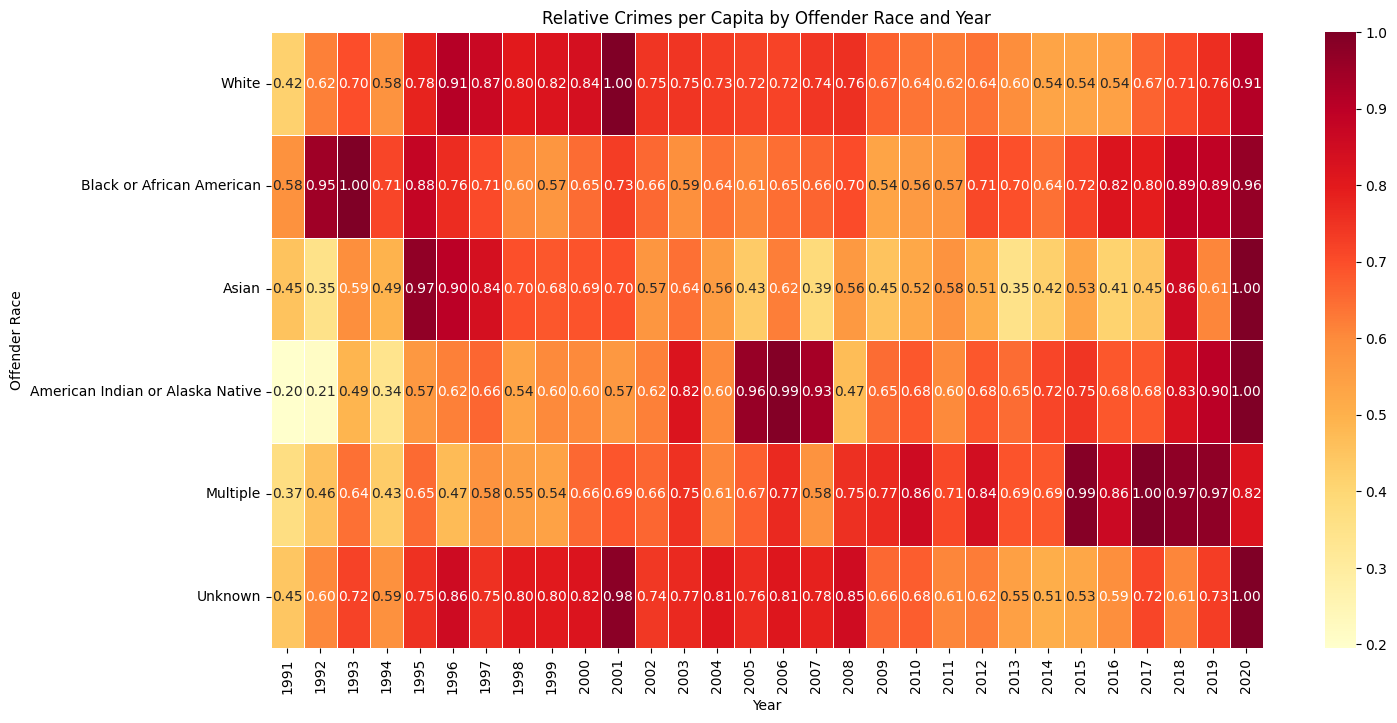

In [4]:
# Reorder categories
offender_race_order = [
    'White', 'Black or African American', 'Asian',
    'American Indian or Alaska Native', 'Multiple', 'Unknown'
]

# Group data by offender race and year
grouped_data_2 = log_data2.groupby(['OFFENDER_RACE', 'DATA_YEAR'])['INCIDENT_ID'].count().reset_index()

# Calculate relative crime count within each offender race
grouped_data_2['RELATIVE_CRIME_COUNT'] = grouped_data_2.groupby('OFFENDER_RACE')['INCIDENT_ID'].transform(lambda x: x / x.max())

# Create a pivot table for heatmap
heatmap_data = grouped_data_2.pivot(index='OFFENDER_RACE', columns='DATA_YEAR', values='RELATIVE_CRIME_COUNT')

# Change the order of categories
heatmap_data = heatmap_data.loc[offender_race_order]

# Remove 'Native Hawaiian or Pacific Islander'
heatmap_data = heatmap_data.drop(index='Native Hawaiian or Pacific Islander', errors='ignore')

# Create the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".2f", linewidths=.5)
plt.title('Relative Crimes per Capita by Offender Race and Year')
plt.xlabel('Year')
plt.ylabel('Offender Race')
plt.show()




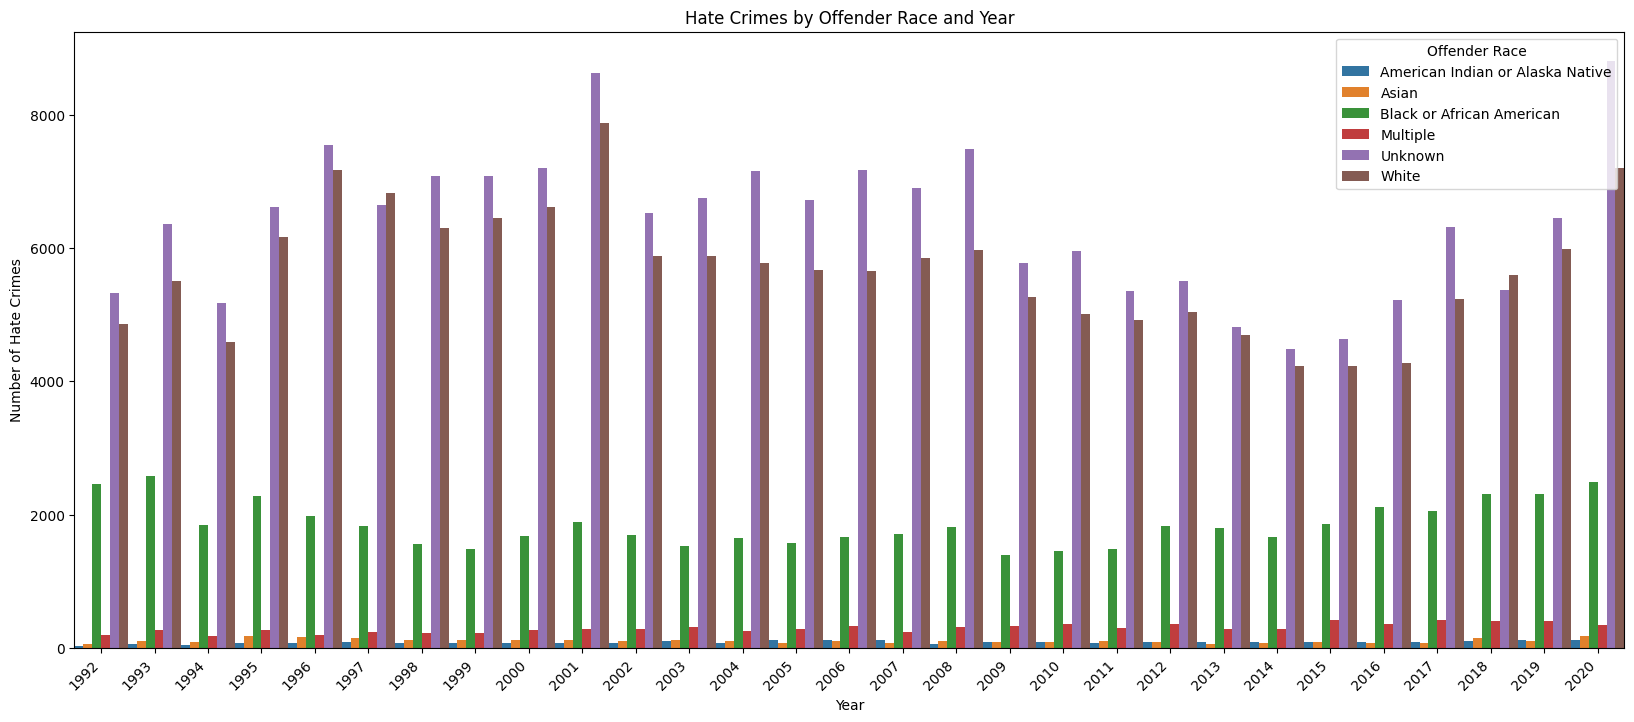

In [13]:
# Exclude 'Native Hawaiian or Pacific Islander' and year 1991
filtered_data = log_data2[
    (log_data2['OFFENDER_RACE'] != 'Native Hawaiian or Other Pacific Islander') &
    (log_data2['DATA_YEAR'] != 1991)
]

# Group data by offender race and year
grouped_data = filtered_data.groupby(['OFFENDER_RACE', 'DATA_YEAR'])['INCIDENT_ID'].count().reset_index()

# Create a bar plot
plt.figure(figsize=(20, 8))
sns.barplot(x='DATA_YEAR', y='INCIDENT_ID', hue='OFFENDER_RACE', data=grouped_data, width=1.0)
plt.title('Hate Crimes by Offender Race and Year')
plt.xlabel('Year')
plt.ylabel('Number of Hate Crimes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Offender Race')
plt.show()


In [16]:
# Create a contingency table of the two categorical variables
contingency_table_us = pd.crosstab(log_data2['OFFENDER_RACE'], log_data2['BIAS_DESC'])

# Perform the Chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table_us)

# Print the results
print("Chi-square value:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square value: 135203.9901127689
P-value: 0.0
Degrees of freedom: 1650
Expected frequencies table:
[[2.63213961e+01 1.69560207e-02 6.78240827e-02 ... 2.26080276e-02
  2.76620521e+02 1.13040138e-02]
 [3.38698446e+01 2.18186673e-02 8.72746693e-02 ... 2.90915564e-02
  3.55949739e+02 1.45457782e-02]
 [6.04966692e+02 3.89714425e-01 1.55885770e+00 ... 5.19619233e-01
  6.35780113e+03 2.59809617e-01]
 ...
 [1.81075498e+00 1.16647304e-03 4.66589214e-03 ... 1.55529738e-03
  1.90298411e+01 7.77648690e-04]
 [2.06199177e+03 1.32831766e+00 5.31327062e+00 ... 1.77109021e+00
  2.16701742e+04 8.85545104e-01]
 [1.83272401e+03 1.18062530e+00 4.72250122e+00 ... 1.57416707e+00
  1.92607212e+04 7.87083536e-01]]


<Figure size 1000x600 with 0 Axes>

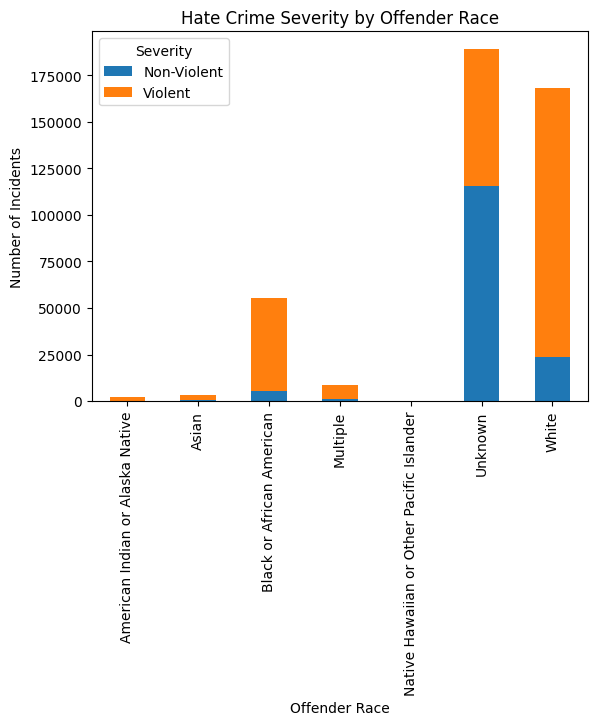

In [17]:
# Group data by 'OFFENDER_RACE' and 'SEVERITY' and count occurrences
grouped_data3 = log_data2.groupby(['OFFENDER_RACE', 'SEVERITY'])['INCIDENT_ID'].count().reset_index()

# Pivot the data for stacked bar plot
pivot_data = grouped_data3.pivot(index='OFFENDER_RACE', columns='SEVERITY', values='INCIDENT_ID')

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True)
plt.title('Hate Crime Severity by Offender Race')
plt.xlabel('Offender Race')
plt.ylabel('Number of Incidents')
plt.legend(title='Severity')
plt.show()


<Figure size 1000x600 with 0 Axes>

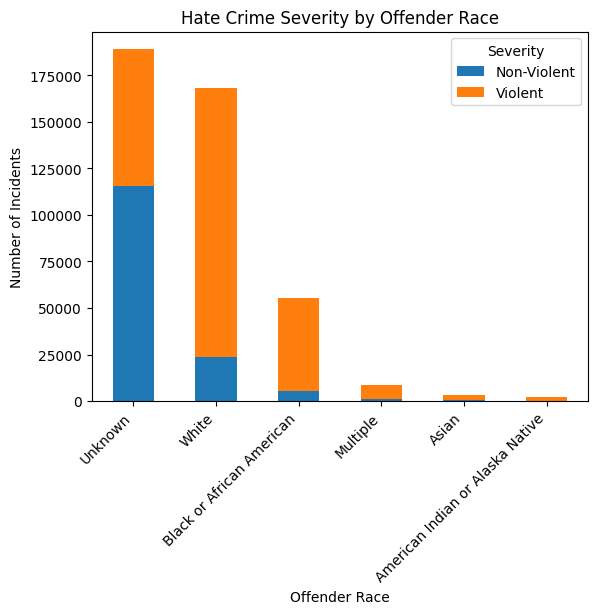

In [31]:
# Filter out 'Native Hawaiian or Pacific Islander'
filtered_data3 = log_data2[log_data2['OFFENDER_RACE'] != 'Native Hawaiian or Other Pacific Islander']

# Group data by 'OFFENDER_RACE' and 'SEVERITY' and count occurrences
grouped_data3 = filtered_data3.groupby(['OFFENDER_RACE', 'SEVERITY'])['INCIDENT_ID'].count().reset_index()

# Pivot the data for stacked bar plot
pivot_data = grouped_data3.pivot(index='OFFENDER_RACE', columns='SEVERITY', values='INCIDENT_ID')

# Calculate total incidents per offender race for sorting
pivot_data['Total'] = pivot_data.sum(axis=1)

# Sort the data by total incidents in descending order
pivot_data = pivot_data.sort_values(by='Total', ascending=False).drop(columns='Total')

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True)
plt.title('Hate Crime Severity by Offender Race')
plt.xlabel('Offender Race')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Severity')
plt.show()


In [11]:
bias_counts = log_data2['BIAS_DESC'].value_counts()


In [12]:
print(bias_counts.head(10))
bias_counts.to_csv('../src/bias_count.csv', index=False)


Anti-Black or African American                               145883
Anti-Jewish                                                   54450
Anti-White                                                    48946
Anti-Gay (Male)                                               42073
Anti-Hispanic or Latino                                       27182
Anti-Other Race/Ethnicity/Ancestry                            21064
Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)     13280
Anti-Asian                                                    12259
Anti-Multiple Races, Group                                    10417
Anti-Lesbian (Female)                                          8681
Name: BIAS_DESC, dtype: int64


<Figure size 1200x800 with 0 Axes>

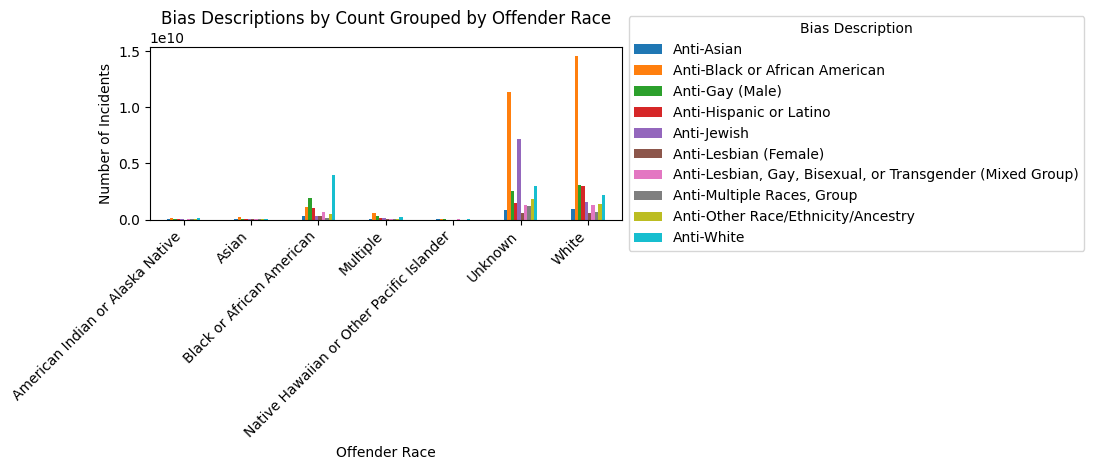

In [30]:
# Filter data to include only the specified bias descriptions
desired_bias_desc = [
    "Anti-Black or African American",
    "Anti-Jewish",
    "Anti-White",
    "Anti-Gay (Male)",
    "Anti-Hispanic or Latino",
    "Anti-Other Race/Ethnicity/Ancestry",
    "Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Asian",
    "Anti-Multiple Races, Group","Anti-Lesbian (Female)"
]

filtered_data = log_data2[log_data2['BIAS_DESC'].isin(desired_bias_desc)]

# Group data by 'OFFENDER_RACE' and 'BIAS_DESC' and sum occurrences
grouped_data = filtered_data.groupby(['OFFENDER_RACE', 'BIAS_DESC'])['INCIDENT_ID'].sum().reset_index()

# Pivot the data for bar plot
pivot_data = grouped_data.pivot(index='OFFENDER_RACE', columns='BIAS_DESC', values='INCIDENT_ID')

# Create a bar plot
plt.figure(figsize=(12, 8))
ax = pivot_data.plot(kind='bar', stacked=False)
plt.title('Bias Descriptions by Count Grouped by Offender Race')
plt.xlabel('Offender Race')
plt.ylabel('Number of Incidents')
plt.legend(title='Bias Description', loc='upper left')  # Adjust the legend placement
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Move the legend to the right side of the plot
ax.legend(title='Bias Description', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()





In [7]:
top_bias_desc

,OFFENDER_RACE,level_1,INCIDENT_ID
0,American Indian or Alaska Native,32,743
1,American Indian or Alaska Native,4,525
2,American Indian or Alaska Native,14,241
3,American Indian or Alaska Native,8,208
4,American Indian or Alaska Native,0,196
...,...,...,...
65,White,573,8272
66,White,544,5228
67,White,436,5025
68,White,541,3447


<Figure size 800x600 with 0 Axes>

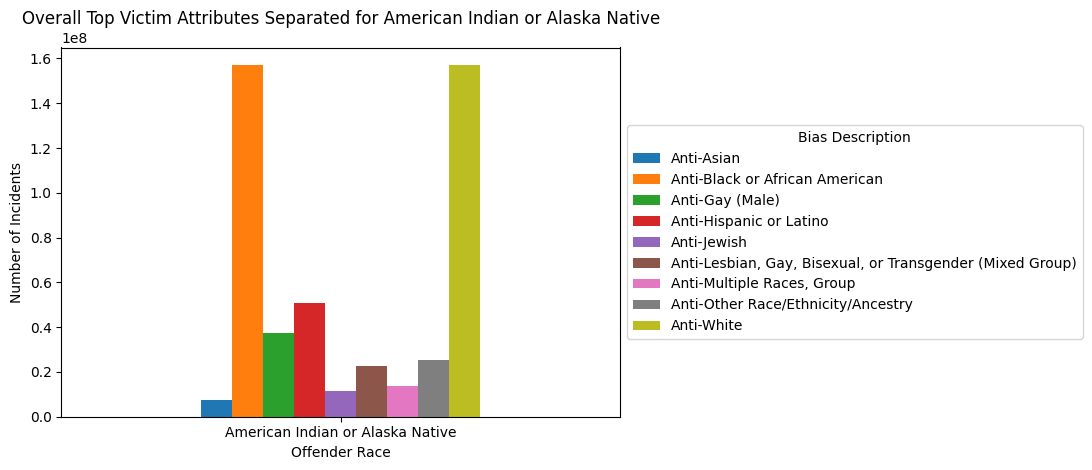

<Figure size 800x600 with 0 Axes>

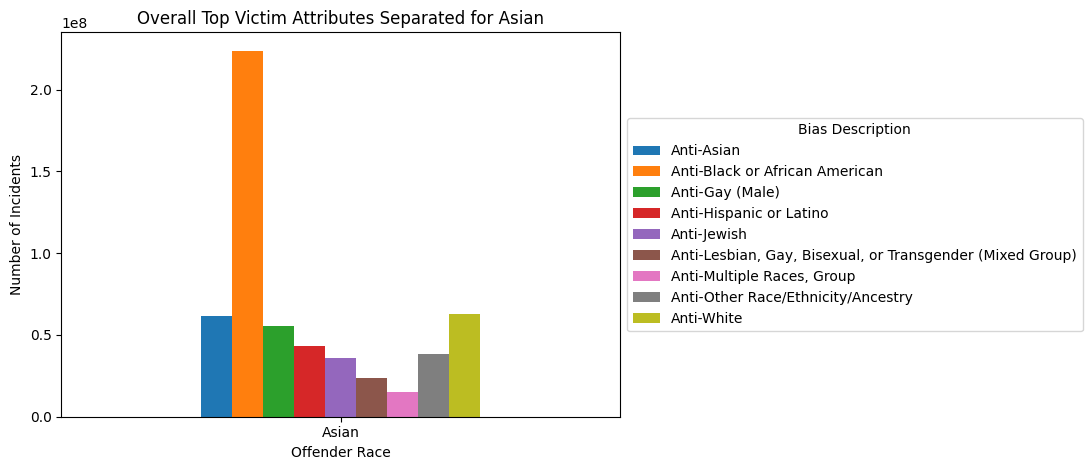

<Figure size 800x600 with 0 Axes>

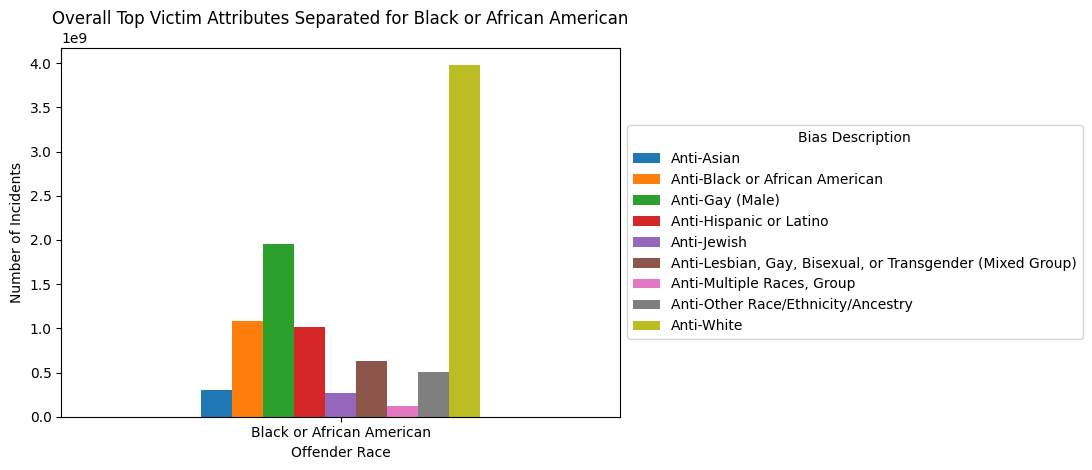

<Figure size 800x600 with 0 Axes>

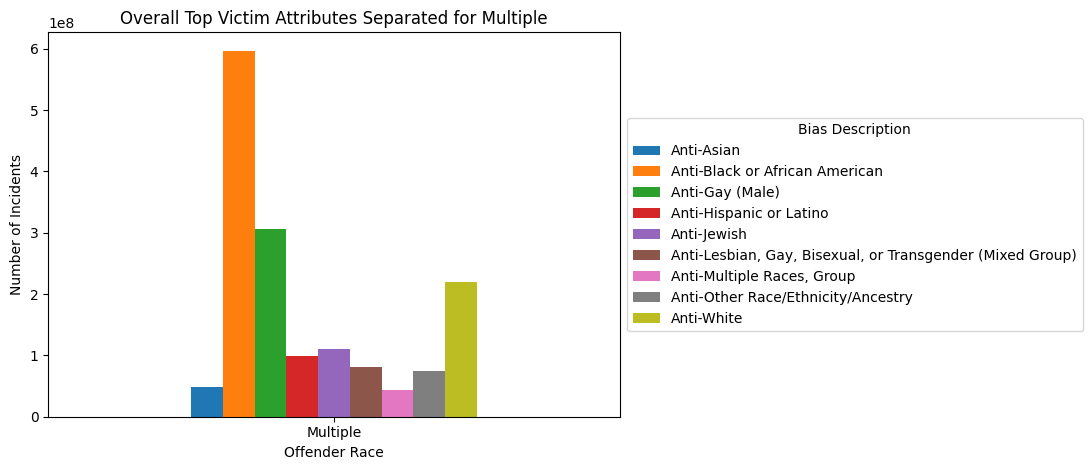

<Figure size 800x600 with 0 Axes>

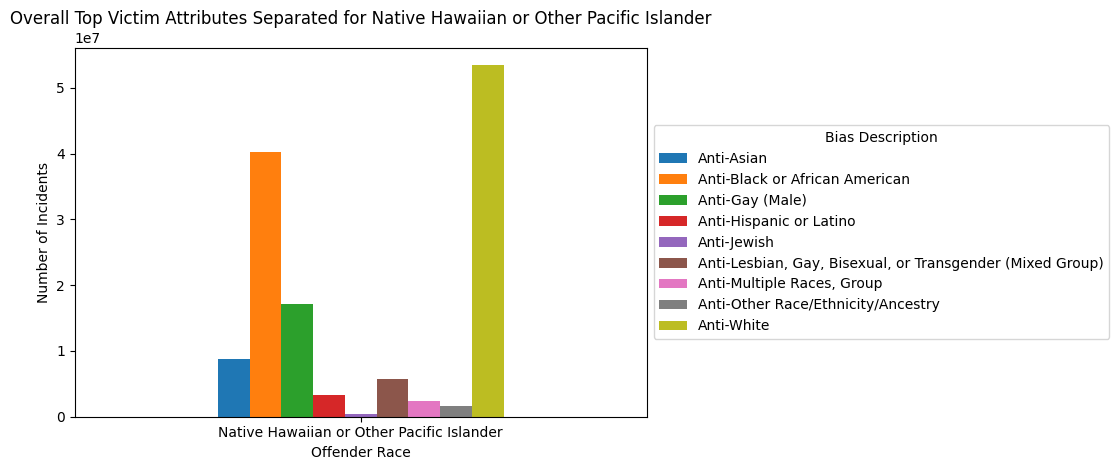

<Figure size 800x600 with 0 Axes>

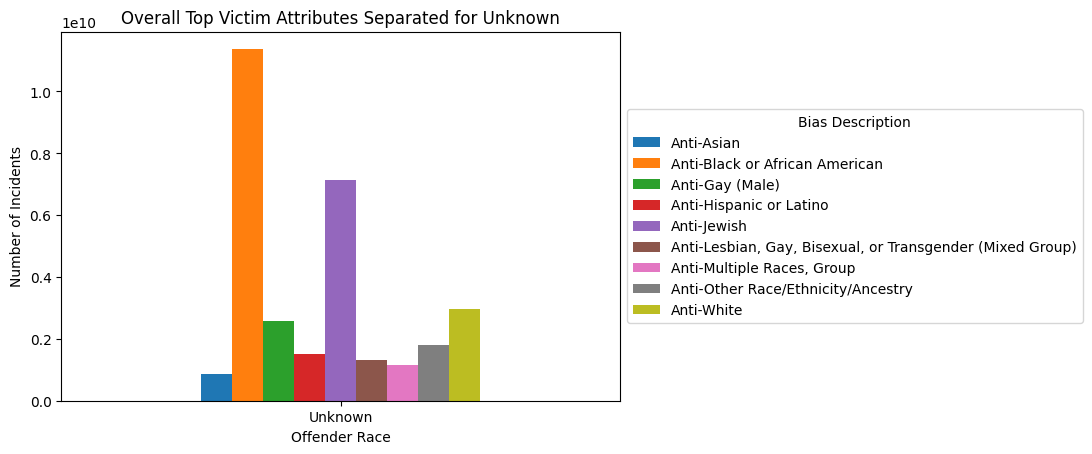

<Figure size 800x600 with 0 Axes>

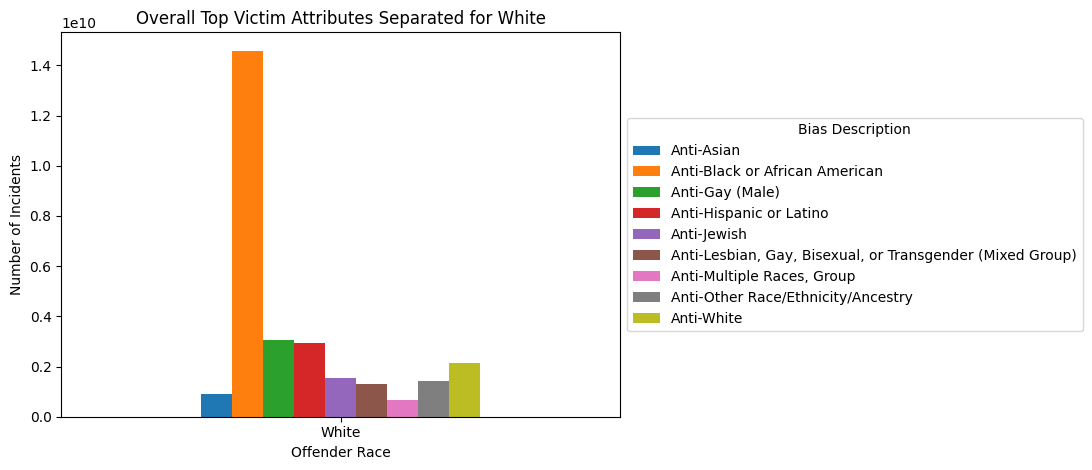

In [33]:
# Filter data to include only the specified bias descriptions
desired_bias_desc = [
    "Anti-Black or African American",
    "Anti-Jewish",
    "Anti-White",
    "Anti-Gay (Male)",
    "Anti-Hispanic or Latino",
    "Anti-Other Race/Ethnicity/Ancestry",
    "Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Asian",
    "Anti-Multiple Races, Group","Anti-Lesbian (Female)"
]

filtered_data = log_data2[log_data2['BIAS_DESC'].isin(desired_bias_desc)]

# Group data by 'OFFENDER_RACE' and 'BIAS_DESC' and sum occurrences
grouped_data = filtered_data.groupby(['OFFENDER_RACE', 'BIAS_DESC'])['INCIDENT_ID'].sum().reset_index()

# Get unique offender races
unique_offender_races = grouped_data['OFFENDER_RACE'].unique()

# Create separate bar graphs for each offender race
for offender_race in unique_offender_races:
    offender_race_data = grouped_data[grouped_data['OFFENDER_RACE'] == offender_race]
    pivot_data = offender_race_data.pivot(index='OFFENDER_RACE', columns='BIAS_DESC', values='INCIDENT_ID')

    plt.figure(figsize=(8, 6))
    ax = pivot_data.plot(kind='bar', stacked=False)
    plt.title(f'Overall Top Victim Attributes Separated for {offender_race}')
    plt.xlabel('Offender Race')
    plt.ylabel('Number of Incidents')
    plt.legend(title='Bias Description')
    plt.xticks(rotation=0)
    plt.tight_layout()

    ax.legend(title='Bias Description', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()


In [36]:
# List of desired bias descriptions
desired_bias_desc = [
    "Anti-Black or African American",
    "Anti-Jewish",
    "Anti-White",
    "Anti-Gay (Male)",
    "Anti-Hispanic or Latino",
    "Anti-Other Race/Ethnicity/Ancestry",
    "Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)",
    "Anti-Asian",
    "Anti-Multiple Races, Group",
    "Anti-Lesbian (Female)"
]

# Filter data by desired bias descriptions
filtered_data = log_data2[log_data2['BIAS_DESC'].isin(desired_bias_desc)]

# Group data by 'OFFENDER_RACE' and 'BIAS_DESC', then count occurrences
bias_desc_by_race = filtered_data.groupby(['OFFENDER_RACE', 'BIAS_DESC']).size().reset_index(name='COUNT')

# Print the result
print(bias_desc_by_race)
bias_desc_by_race.to_csv('../src/bias_by_race.csv', index=False)



                       OFFENDER_RACE  \
0   American Indian or Alaska Native   
1   American Indian or Alaska Native   
2   American Indian or Alaska Native   
3   American Indian or Alaska Native   
4   American Indian or Alaska Native   
..                               ...   
64                             White   
65                             White   
66                             White   
67                             White   
68                             White   

                                            BIAS_DESC  COUNT  
0                                          Anti-Asian     64  
1                      Anti-Black or African American    525  
2                                     Anti-Gay (Male)    208  
3                             Anti-Hispanic or Latino    241  
4                                         Anti-Jewish     57  
..                                                ...    ...  
64                              Anti-Lesbian (Female)   3447  
65  Anti-Lesbia

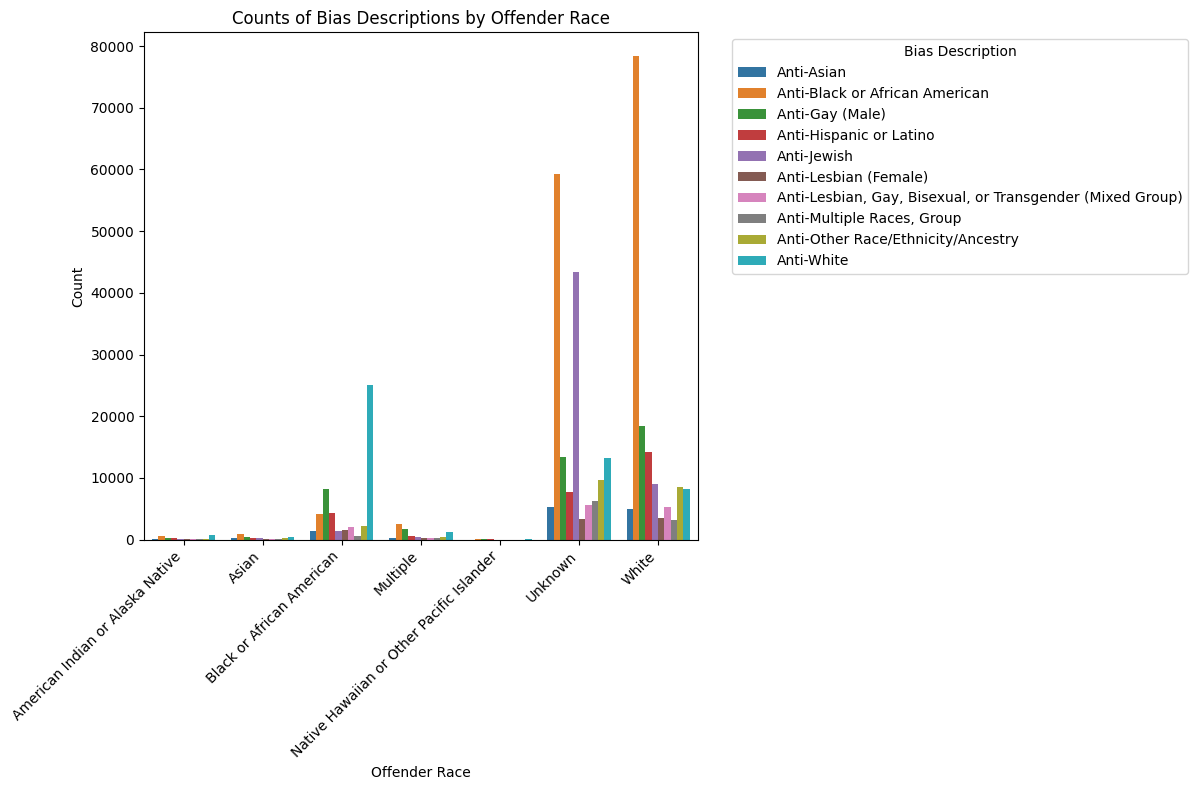

In [37]:


# Create an unstacked bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='OFFENDER_RACE', y='COUNT', hue='BIAS_DESC', data=bias_desc_by_race)
plt.title('Counts of Bias Descriptions by Offender Race')
plt.xlabel('Offender Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bias Description', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


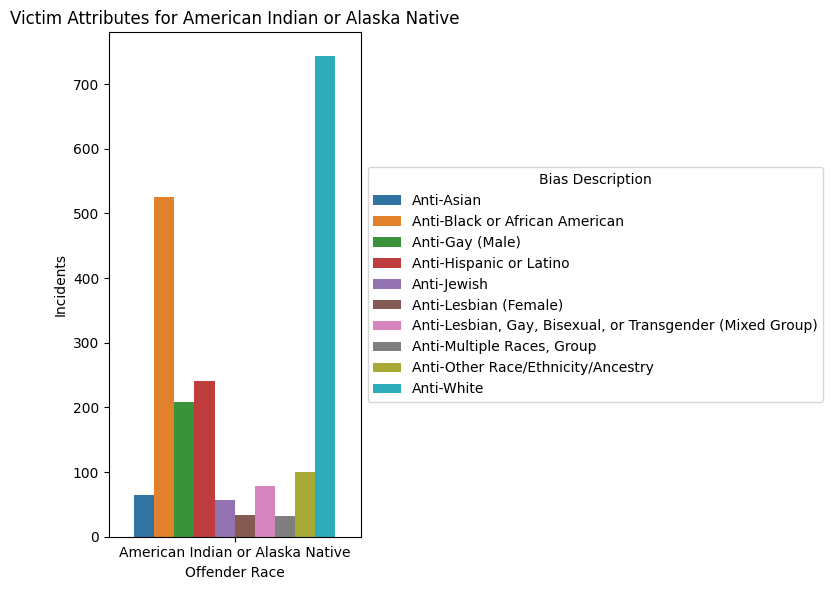

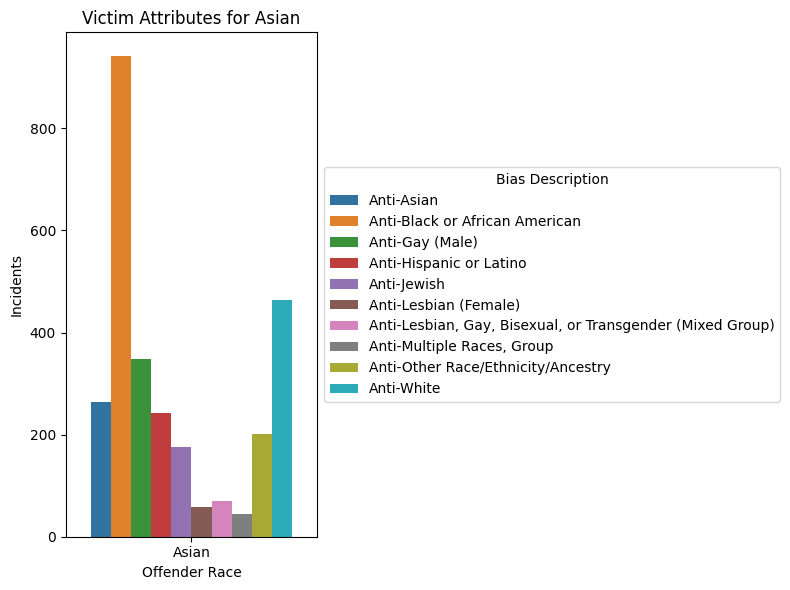

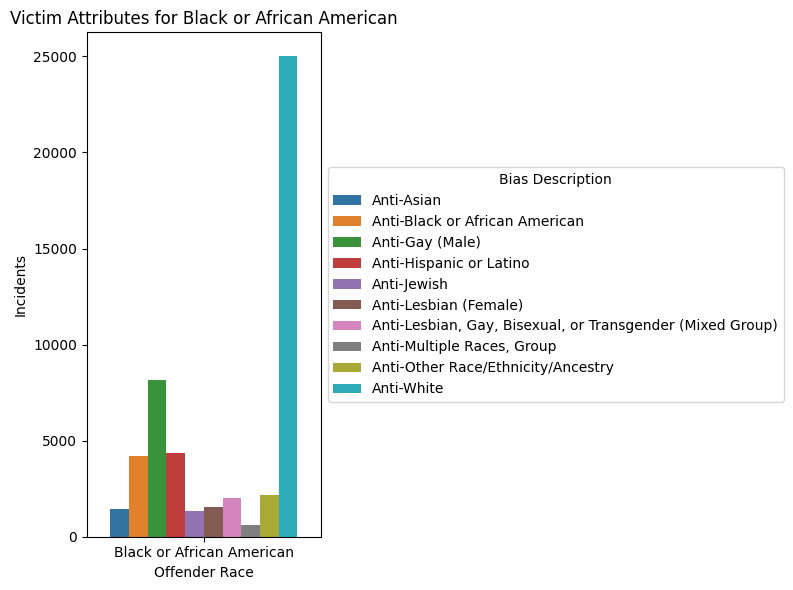

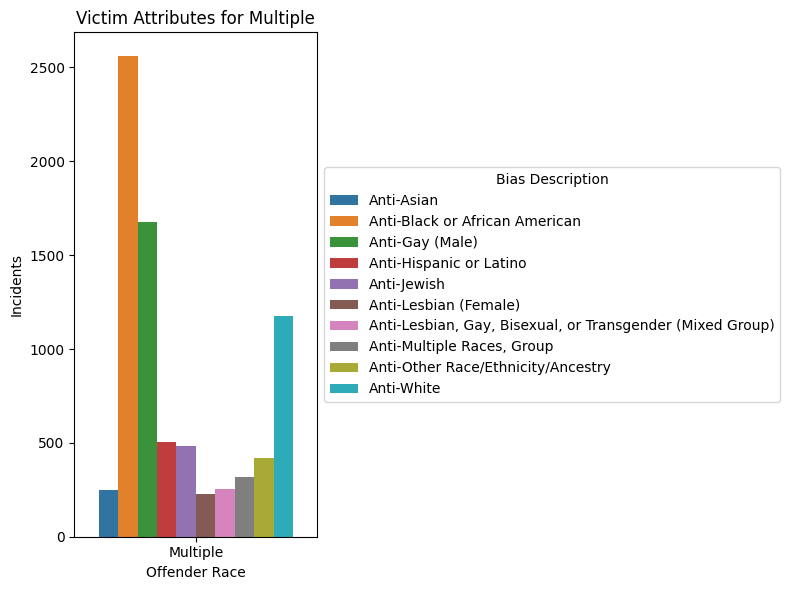

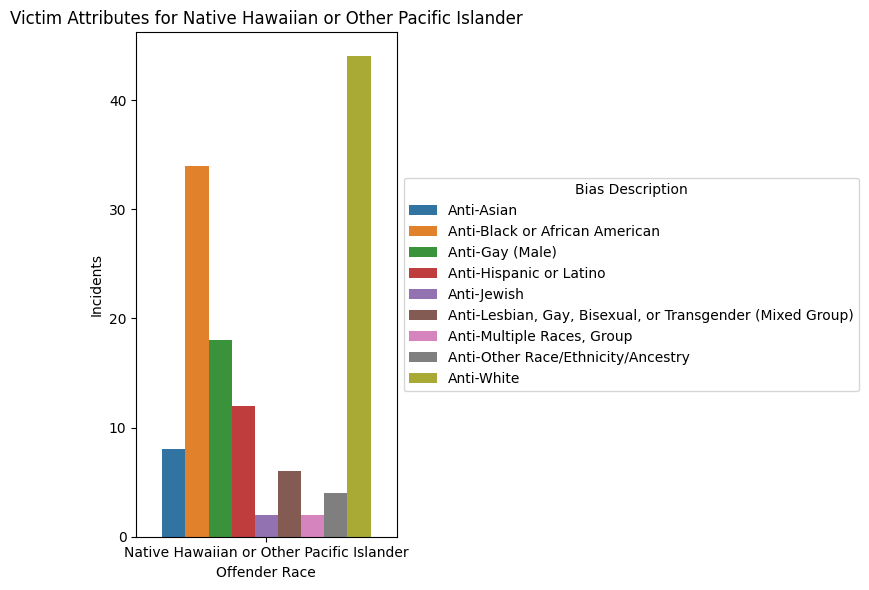

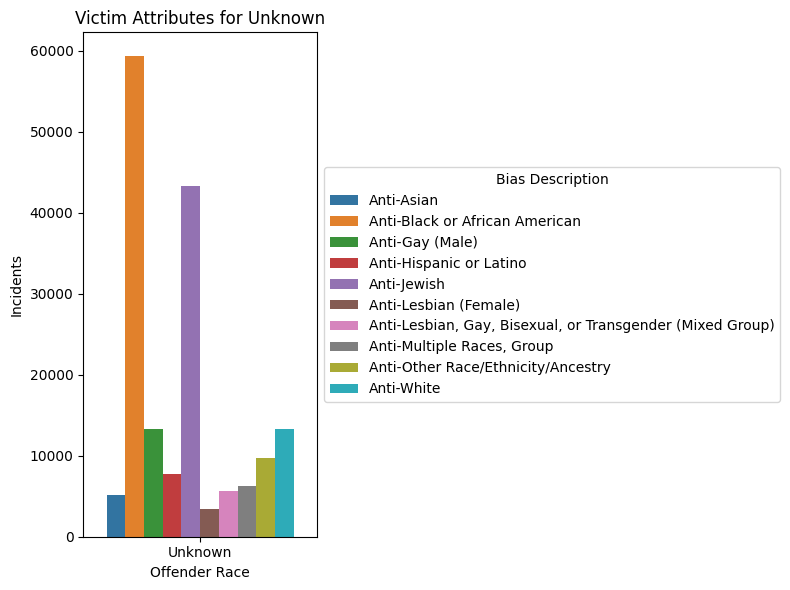

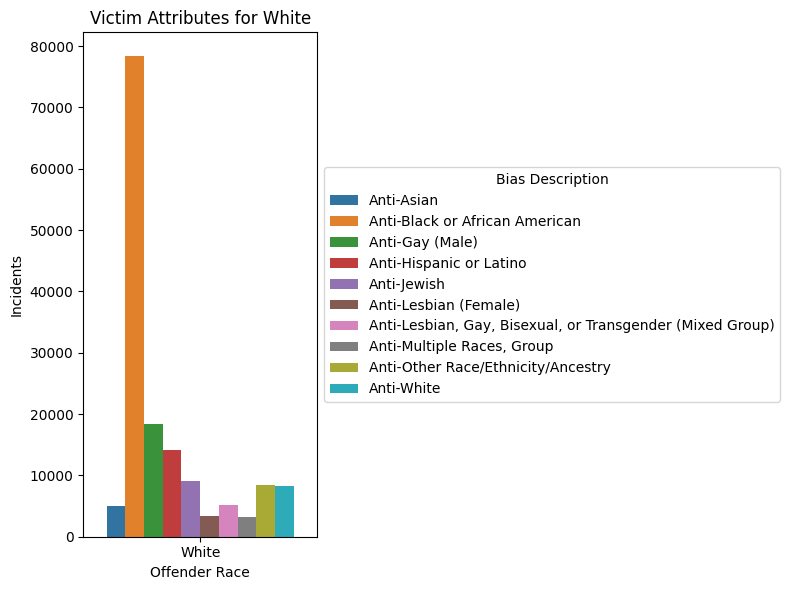

In [46]:
# Get unique offender races
unique_offender_races = bias_desc_by_race['OFFENDER_RACE'].unique()

# Create separate bar graphs for each offender race
for race in unique_offender_races:
    race_data = bias_desc_by_race[bias_desc_by_race['OFFENDER_RACE'] == race]
    
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x='OFFENDER_RACE', y='COUNT', hue='BIAS_DESC', data=race_data)
    plt.title(f'Victim Attributes for {race}')
    plt.xlabel('Offender Race')
    plt.ylabel('Incidents')
    plt.xticks(rotation=0)
    
    # Move the legend outside the plot
    ax.legend(title='Bias Description', loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()


<Figure size 2000x1000 with 0 Axes>

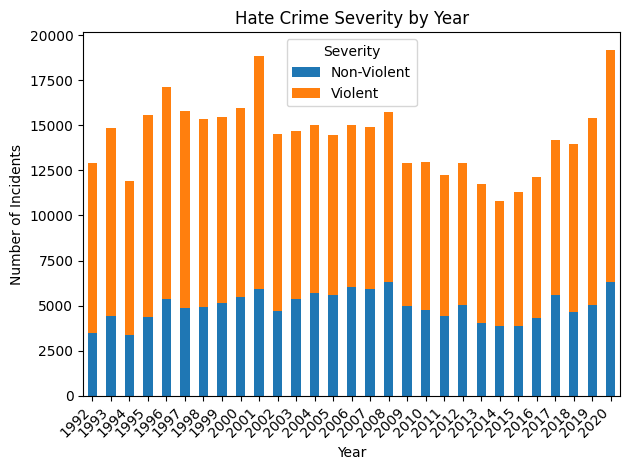

In [61]:
# Exclude 1991 data year
filtered_data = log_data2[log_data2['DATA_YEAR'] != 1991]

# Group data by 'DATA_YEAR' and 'SEVERITY' and count occurrences
grouped_data = filtered_data.groupby(['DATA_YEAR', 'SEVERITY'])['INCIDENT_ID'].count().reset_index()

# Pivot the data for a stacked bar plot
pivot_data = grouped_data.pivot(index='DATA_YEAR', columns='SEVERITY', values='INCIDENT_ID')

# Create a stacked bar plot
plt.figure(figsize=(20, 10))
ax = pivot_data.plot(kind='bar', stacked=True)
plt.title('Hate Crime Severity by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Severity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()
